In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
import numpy as np
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
import os
# Read data from CSV file

csv=[]
cleaned_labels_train1= ['cla_cla_tr','cla_pop_roc_tr','cla_jb_tr','cel_cla_tr','cel_pop_roc_tr','cel_jb_tr','flu_cla_tr','flu_cf_tr','flu_pop_roc_tr','flu_jb_tr','gac_cla_tr','gac_cf_tr','gac_pop_roc_tr','gac_jb_tr'
,'gel_cla_tr','gel_cf_tr','gel_pop_roc_tr','gel_jb_tr'
,'org_cf_tr','org_pop_roc_tr','org_jb_tr'
,'pia_cla_tr','pia_cf_tr','pia_pop_roc_tr','pia_jb_tr'
,'sax_cla_tr','sax_cf_tr','sax_pop_roc_tr','sax_jb_tr'
,'tru_cla_tr','tru_pop_roc_tr','tru_jb_tr'
,'vio_cla_tr','vio_cf_tr','vio_pop_roc_tr','vio_jb_tr'
,'voi_cf_tr','voi_pop_roc_tr','voi_jb_tr']
for i in range(len(cleaned_labels_train1)):
 csv.append(cleaned_labels_train1[i]+'.csv')


import pandas as pd
dfs=[]
for i in range(len(csv)):
  df=pd.read_csv(csv[i], header=None)
  num_rows = df.shape[0]
  num_col=df.shape[1]
  for j in range(len(cleaned_labels_train1)):
   if(cleaned_labels_train1[j] in csv[i]):
    column_name = f'{num_col}'
    df[column_name] = j

  dfs.append(df)
combined_df = pd.concat(dfs, ignore_index=True)
# Save the combined DataFrame to a new CSV file
combined_df.to_csv('combined_data.csv', index=False)


combined_df = combined_df.sample(frac=1, random_state=42)
last_column_index = -1
y_train = combined_df.iloc[:, last_column_index]
X_train = combined_df.iloc[:, :last_column_index]
# Compute the correlation matrix
corr_matrix = X_train.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(50, 50))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", xticklabels=range(X_train.shape[1]), yticklabels=range(X_train.shape[1]))
plt.title("Correlation Matrix of Features")
plt.xlabel("Feature Index")
plt.ylabel("Feature Index")
plt.show()

# Define a threshold for correlation
threshold = 0.8

# Find highly correlated features
highly_correlated = np.where(np.abs(corr_matrix) > threshold)
correlated_features = [(i, j) for i, j in zip(highly_correlated[0], highly_correlated[1]) if i != j and i < j]

print("Highly correlated features:")
for feature in correlated_features:
    print("Features:", feature)

# Remove highly correlated features
X_filtered = X_train.drop(columns=[X_train.columns[feature[1]] for feature in correlated_features])
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
scaler = MinMaxScaler()
X_trainsc = scaler.fit_transform(X_filtered.to_numpy())
X_train_filtered = pd.DataFrame(X_trainsc, columns=X_filtered.columns)


Output hidden; open in https://colab.research.google.com to view.

Best n_estimators: 200
F1 weighted score: 0.8542240072084522


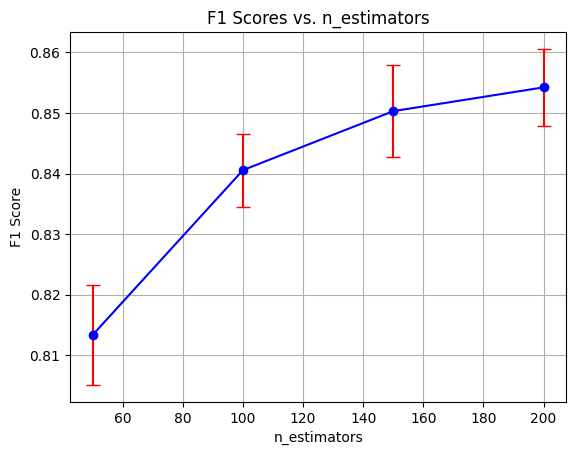

In [15]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, f1_score
import numpy as np



# Create a Random Forest Classifier
random_forest = RandomForestClassifier(random_state=42)

# Define F1 weighted scoring function
scorer = make_scorer(f1_score, average='weighted')

# List of values for n_estimators to try
n_estimators_values = [50, 100, 150, 200]

# Lists to store mean F1 scores
f1_scores_mean = []
f1_scores_std = []
cv_scores={}
# Perform cross-validation for each value of n_estimators
for n_estimators in n_estimators_values:
    # Set the number of estimators
    random_forest.set_params(n_estimators=n_estimators)

    # Perform 5-fold cross-validation and calculate F1 weighted score
    scores = cross_val_score(random_forest, X_train_filtered, y_train, cv=13, scoring=scorer)

    # Store the mean and standard deviation of F1 scores
    f1_scores_mean.append(np.mean(scores))
    f1_scores_std.append(np.std(scores))
    cv_scores[n_estimators] = np.mean(scores)
best_n_estimators = max(cv_scores, key=cv_scores.get)
best_score = cv_scores[best_n_estimators]

print("Best n_estimators:", best_n_estimators)
print("F1 weighted score:", best_score)
# Plot F1 scores
plt.errorbar(n_estimators_values, f1_scores_mean, yerr=f1_scores_std, fmt='o-', color='b', ecolor='r', capsize=5)
plt.title('F1 Scores vs. n_estimators')
plt.xlabel('n_estimators')
plt.ylabel('F1 Score')
plt.grid(True)
plt.show()

In [3]:
directory_names = ['cla_cla_tr','cla_pop_roc_tr','cla_jb_tr','cel_cla_tr','cel_pop_roc_tr','cel_jb_tr','flu_cla_tr','flu_cf_tr','flu_pop_roc_tr','flu_jb_tr','gac_cla_tr','gac_cf_tr','gac_pop_roc_tr','gac_jb_tr'
,'gel_cla_tr','gel_cf_tr','gel_pop_roc_tr','gel_jb_tr'
,'org_cf_tr','org_pop_roc_tr','org_jb_tr'
,'pia_cla_tr','pia_cf_tr','pia_pop_roc_tr','pia_jb_tr'
,'sax_cla_tr','sax_cf_tr','sax_pop_roc_tr','sax_jb_tr'
,'tru_cla_tr','tru_pop_roc_tr','tru_jb_tr'
,'vio_cla_tr','vio_cf_tr','vio_pop_roc_tr','vio_jb_tr'
,'voi_cf_tr','voi_pop_roc_tr','voi_jb_tr']

import csv
from pathlib import Path
file_name=[]
# Define the file name
for i in directory_names:
 file_name.append(i+"ts.csv")

import pandas as pd
dfs=[]
for i in range(len(file_name)):
  if (Path("/content/"+file_name[i])).exists():
   df=pd.read_csv(file_name[i], header=None)
   num_rows = df.shape[0]
   num_col=df.shape[1]
   for j in range(len(cleaned_labels_train1)):
    if(cleaned_labels_train1[j] in file_name[i]):
     column_name = f'{num_col}'
     df[column_name] = j

   dfs.append(df)
test_df = pd.concat(dfs, ignore_index=True)
test_df=test_df.iloc[:, :-1]
test_df=test_df.dropna()
last_column_index = -1
y_test = test_df.iloc[:, last_column_index]
X_test = test_df.iloc[:, :last_column_index]
X_test= X_test.drop(columns=[X_test.columns[feature[1]] for feature in correlated_features])
X_testsc = scaler.transform(X_test.to_numpy())
X_test = pd.DataFrame(X_testsc, columns=X_test.columns)



Accuracy: 0.22345483359746435
F1 weighted score: 0.26508734469220424


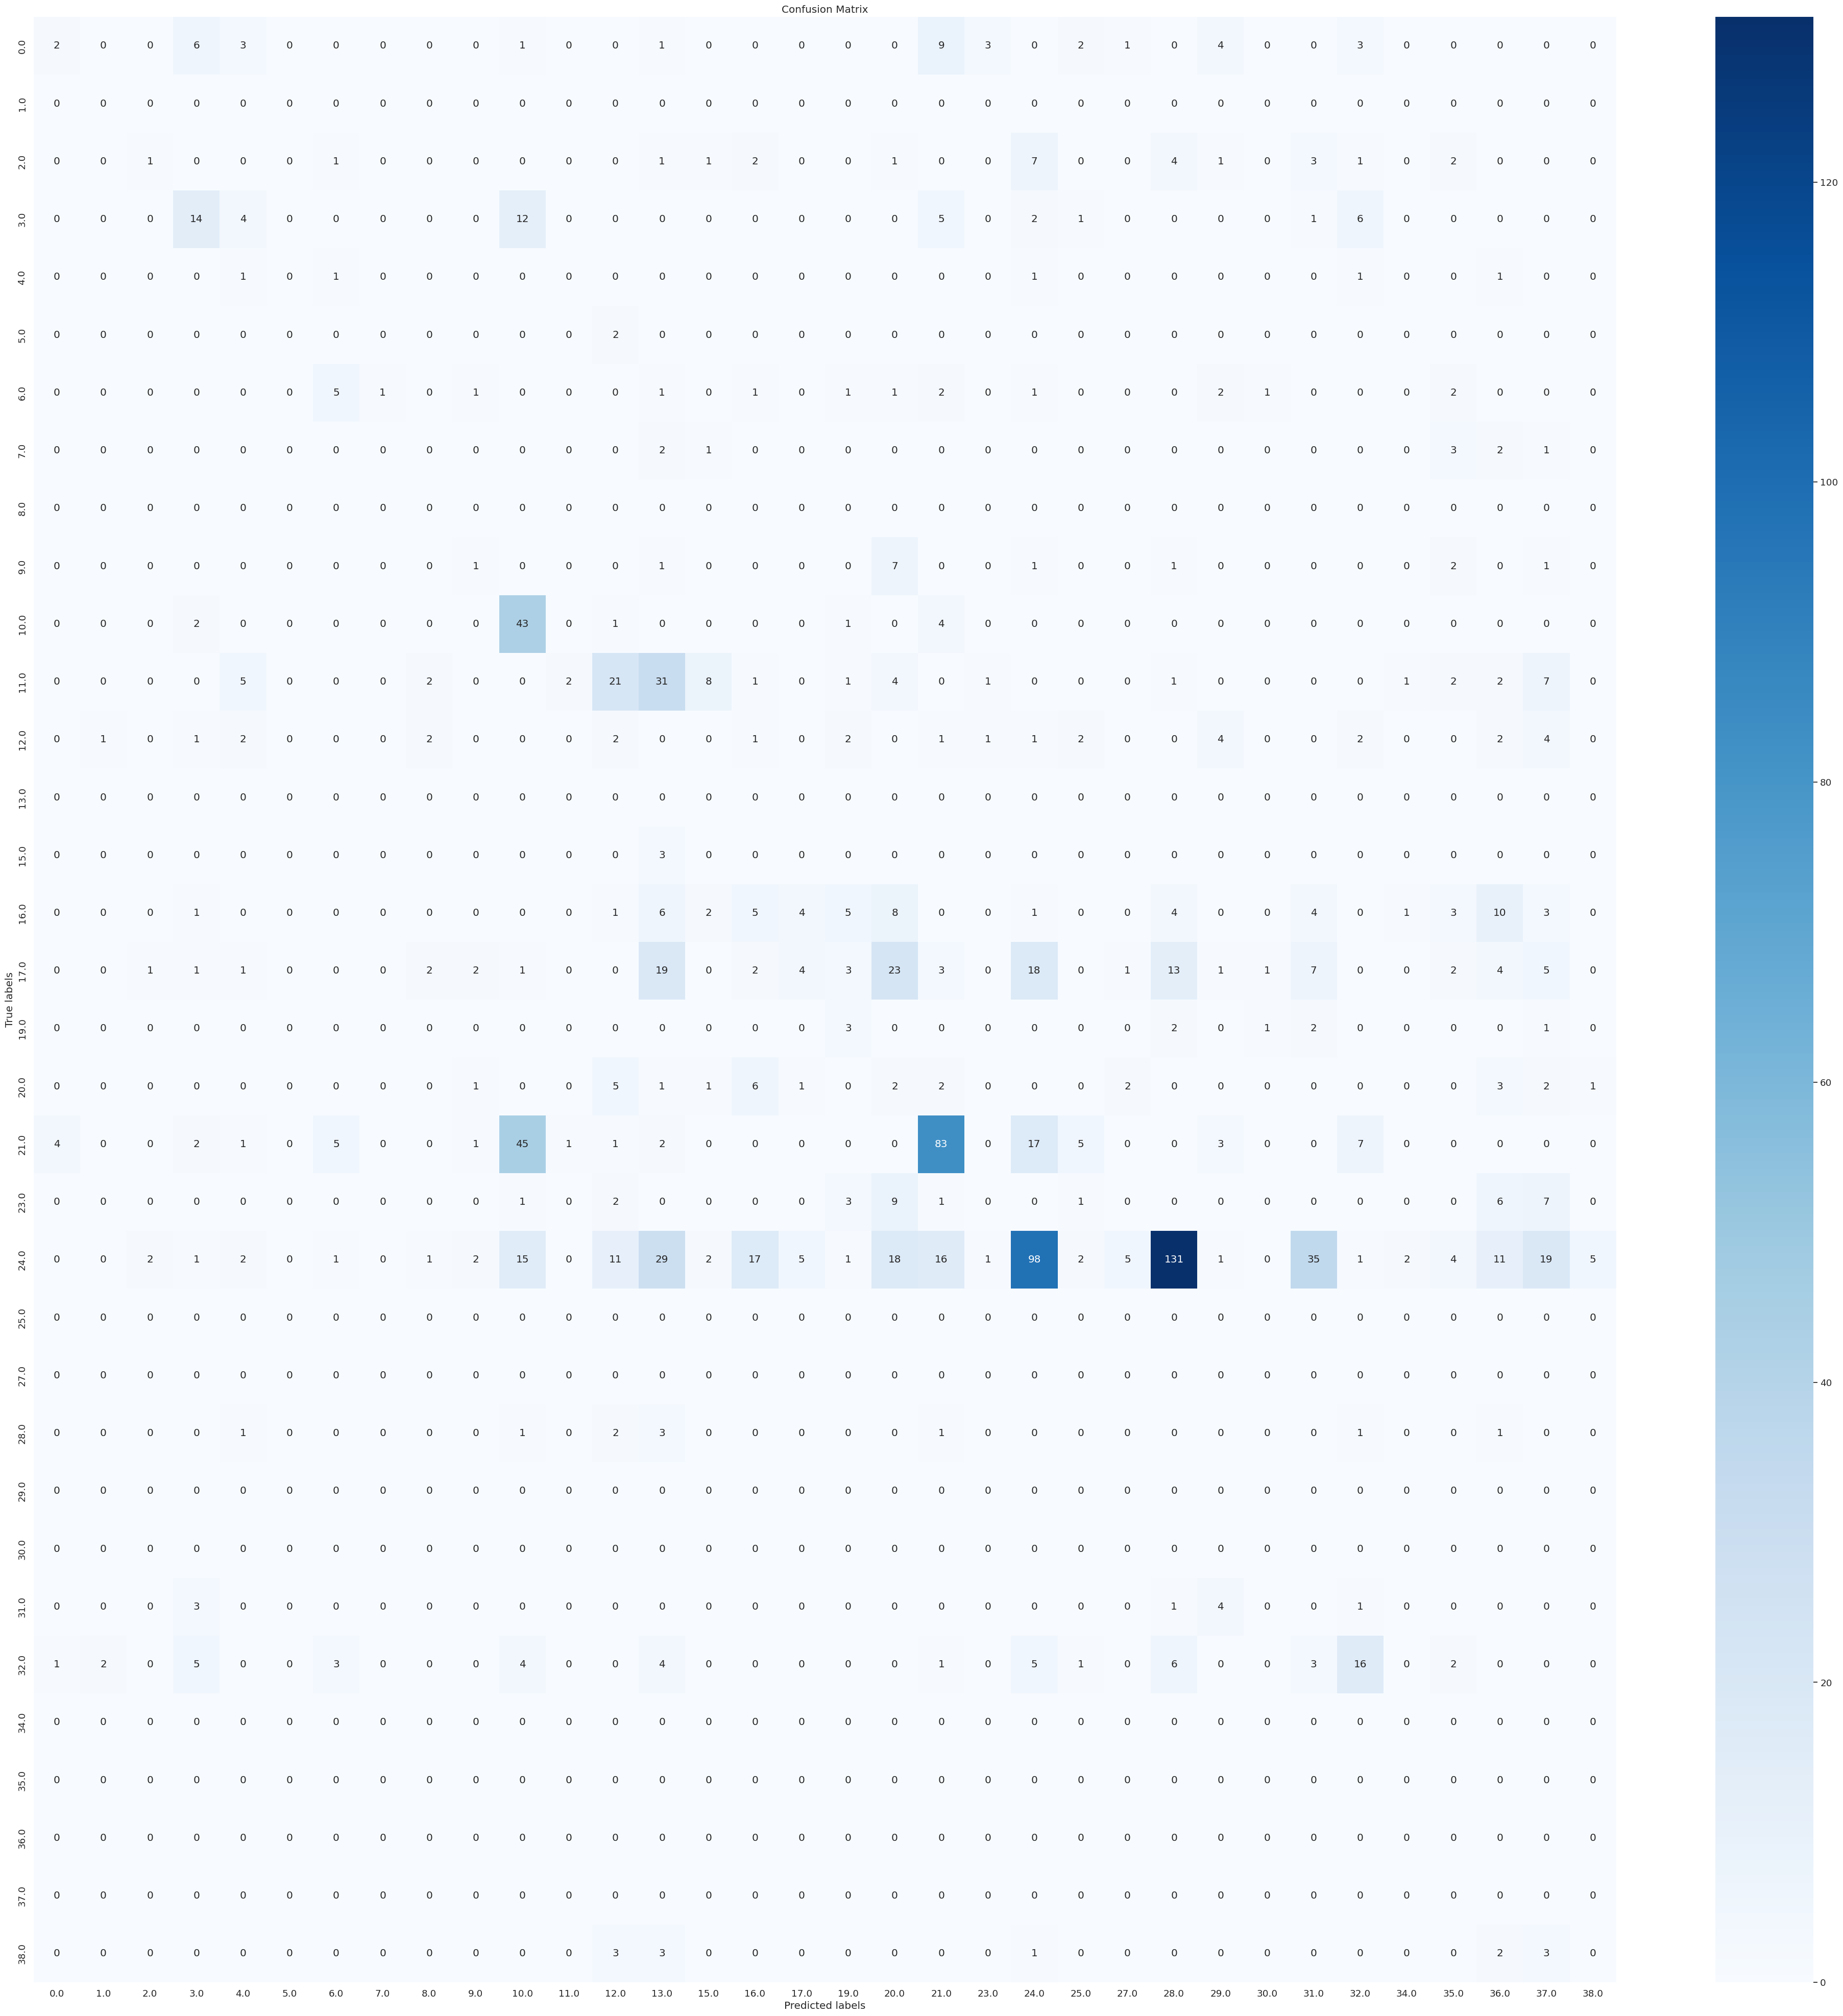

In [9]:
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
# Create a Random Forest Classifier
random_forest = RandomForestClassifier(n_estimators=200, random_state=42)

# Train the model
random_forest.fit(X_train_filtered, y_train)

# Make predictions on the test set
y_pred = random_forest.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
f1_weighted = f1_score(y_test, y_pred, average='weighted')

print("F1 weighted score:", f1_weighted)
cm = confusion_matrix(y_test, y_pred)
# Plot confusion matrix
plt.figure(figsize=(50, 50))
sns.set(font_scale=1.2)
labels = np.unique(np.concatenate((y_test, y_pred)))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()
